In [338]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [339]:
train_data=pd.read_csv('/content/train.csv')
test_data=pd.read_csv('/content/test.csv')
submission=pd.read_csv('/content/gender_submission.csv')

In [340]:
train_data.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [341]:
test_data.head().T

,0,1,2,3,4
PassengerId,892,893,894,895,896
Pclass,3,3,2,3,3
Name,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)","Myles, Mr. Thomas Francis","Wirz, Mr. Albert","Hirvonen, Mrs. Alexander (Helga E Lindqvist)"
Sex,male,female,male,male,female
Age,34.5,47.0,62.0,27.0,22.0
SibSp,0,1,0,0,1
Parch,0,0,0,0,1
Ticket,330911,363272,240276,315154,3101298
Fare,7.8292,7.0,9.6875,8.6625,12.2875
Cabin,NaN,NaN,NaN,NaN,NaN


In [342]:
train_data.shape




(891, 12)

In [343]:
test_data.shape

(418, 11)

In [344]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [345]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [346]:
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [347]:
test_data.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [348]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [349]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [350]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [351]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [352]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

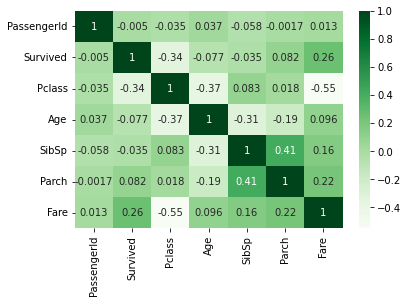

In [353]:
sns.heatmap(train_data.corr(),annot=True,cmap='Greens')

In [354]:
test_data.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.026751,-0.034102,0.003818,0.043080,0.008211
Pclass,-0.026751,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,-0.577147,0.337932,0.171539,0.230046,1.000000


<AxesSubplot:>

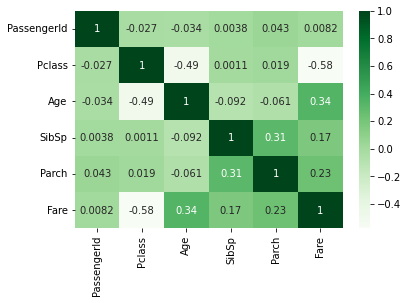

In [355]:
sns.heatmap(test_data.corr(),annot=True,cmap='Greens')

In [356]:
xtr=train_data.drop(['PassengerId','Survived','Name','Ticket','Cabin'],axis=1)
xte=test_data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
ytr=train_data[['Survived']]
xtr

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [357]:
num_cols=list(xtr.select_dtypes(exclude='object').columns)
cat_cols=list(xtr.select_dtypes(include='object').columns)

In [358]:
cat_cols

['Sex', 'Embarked']

In [359]:
xtr_num=xtr[num_cols]
xtr_cat=xtr[cat_cols]
xtr[cat_cols]=xtr[cat_cols].astype("category")
xtr_cat

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [360]:
cat_cols

['Sex', 'Embarked']

In [361]:
xtr_num

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500
...,...,...,...,...,...
886,2,27.0,0,0,13.0000
887,1,19.0,0,0,30.0000
888,3,NaN,1,2,23.4500
889,1,26.0,0,0,30.0000


In [362]:
xtr_cat.shape

(891, 2)

In [363]:
from sklearn.impute import SimpleImputer 
xtr_imp=SimpleImputer(strategy='most_frequent')
xtr_imp.fit(xtr_cat)
xtr_cat=pd.DataFrame(xtr_imp.transform(xtr_cat),columns=cat_cols)

In [364]:
xtr_imp=SimpleImputer(strategy='mean')
xtr_imp.fit(xtr_num)
xtr_num=pd.DataFrame(xtr_imp.transform(xtr_num),columns=num_cols)

In [365]:
xtr_cat

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [366]:
xtr_num.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [367]:
xtr_cat.isnull().sum()

Sex         0
Embarked    0
dtype: int64

In [368]:
num_cols1=list(xte.select_dtypes(exclude='object').columns)
cat_cols1=list(xte.select_dtypes(include='object').columns)

In [369]:
cat_cols1

['Sex', 'Embarked']

In [370]:
num_cols1

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [371]:
xte_num=xtr[num_cols1]
xte_cat=xtr[cat_cols1]
xte[cat_cols1]=xte[cat_cols1].astype("category")
xte_cat

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [372]:
xte_num

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500
...,...,...,...,...,...
886,2,27.0,0,0,13.0000
887,1,19.0,0,0,30.0000
888,3,NaN,1,2,23.4500
889,1,26.0,0,0,30.0000


In [373]:
from sklearn.impute import SimpleImputer 
xte_imp=SimpleImputer(strategy='most_frequent')
xte_imp.fit(xte_cat)
xte_cat=pd.DataFrame(xte_imp.transform(xte_cat),columns=cat_cols1)

In [374]:
xte_imp=SimpleImputer(strategy='mean')
xte_imp.fit(xte_num)
xte_num=pd.DataFrame(xte_imp.transform(xte_num),columns=num_cols1)

In [375]:
xte_cat.isnull().sum()

Sex         0
Embarked    0
dtype: int64

In [376]:
xte_num.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [377]:
from sklearn.preprocessing import  LabelEncoder
encoder=LabelEncoder()
for col in cat_cols: 
    xtr_cat[col]=encoder.fit_transform(xtr_cat[col]) 
    

In [378]:
xtr_cat

,Sex,Embarked
0,1,2
1,0,0
2,0,2
3,0,2
4,1,2
...,...,...
886,1,2
887,0,2
888,0,2
889,1,0


In [379]:
from sklearn.preprocessing import  LabelEncoder
encoder=LabelEncoder()
for col in cat_cols: 
    xte_cat[col]=encoder.fit_transform(xte_cat[col]) 

In [380]:
xte_cat

,Sex,Embarked
0,1,2
1,0,0
2,0,2
3,0,2
4,1,2
...,...,...
886,1,2
887,0,2
888,0,2
889,1,0


In [381]:
train_data=pd.concat([xtr_cat,xtr_num],axis=1)

In [382]:
columns=train_data.columns
columns

Index(['Sex', 'Embarked', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [383]:
encoder=LabelEncoder()
for col in cat_cols: 
    xte_cat[col]=encoder.fit_transform(xte_cat[col]) 


In [384]:
xte_cat

,Sex,Embarked
0,1,2
1,0,0
2,0,2
3,0,2
4,1,2
...,...,...
886,1,2
887,0,2
888,0,2
889,1,0


In [385]:
test_data1=pd.concat([xte_cat,xte_num],axis=1)
test_data1.head()

,Sex,Embarked,Pclass,Age,SibSp,Parch,Fare
0,1,2,3.0,22.0,1.0,0.0,7.2500
1,0,0,1.0,38.0,1.0,0.0,71.2833
2,0,2,3.0,26.0,0.0,0.0,7.9250
3,0,2,1.0,35.0,1.0,0.0,53.1000
4,1,2,3.0,35.0,0.0,0.0,8.0500


In [386]:
columns=test_data1.columns
columns

Index(['Sex', 'Embarked', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [387]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
train_data=pd.DataFrame(scale.fit_transform(train_data),columns=columns)
test_data1=pd.DataFrame(scale.fit_transform(test_data1),columns=columns)


In [388]:
import numpy as np
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, x, y):
        num_samples, num_features = x.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for i in range(self.num_iterations):
            # Forward propagation
            z = np.dot(x, self.weights) + self.bias
            y_pred = self.sigmoid(z)

            # Backward propagation
            dw = (1 / num_samples) * np.dot(x.T, (y_pred - y))
            db = (1 / num_samples) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

        y_pred = self.predict(x)
        accuracy = np.mean(y_pred == y)
        print("Accuracy:", accuracy)

    def predict(self, x):
        z = np.dot(x, self.weights) + self.bias
        y_pred = self.sigmoid(z)
        y_pred_class = [1 if i > 0.5 else 0 for i in y_pred]
        return np.array(y_pred_class)

     


In [389]:
#test accuracy
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

Accuracy: 0.75


In [390]:
#train accuracy
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)

Accuracy: 0.75
